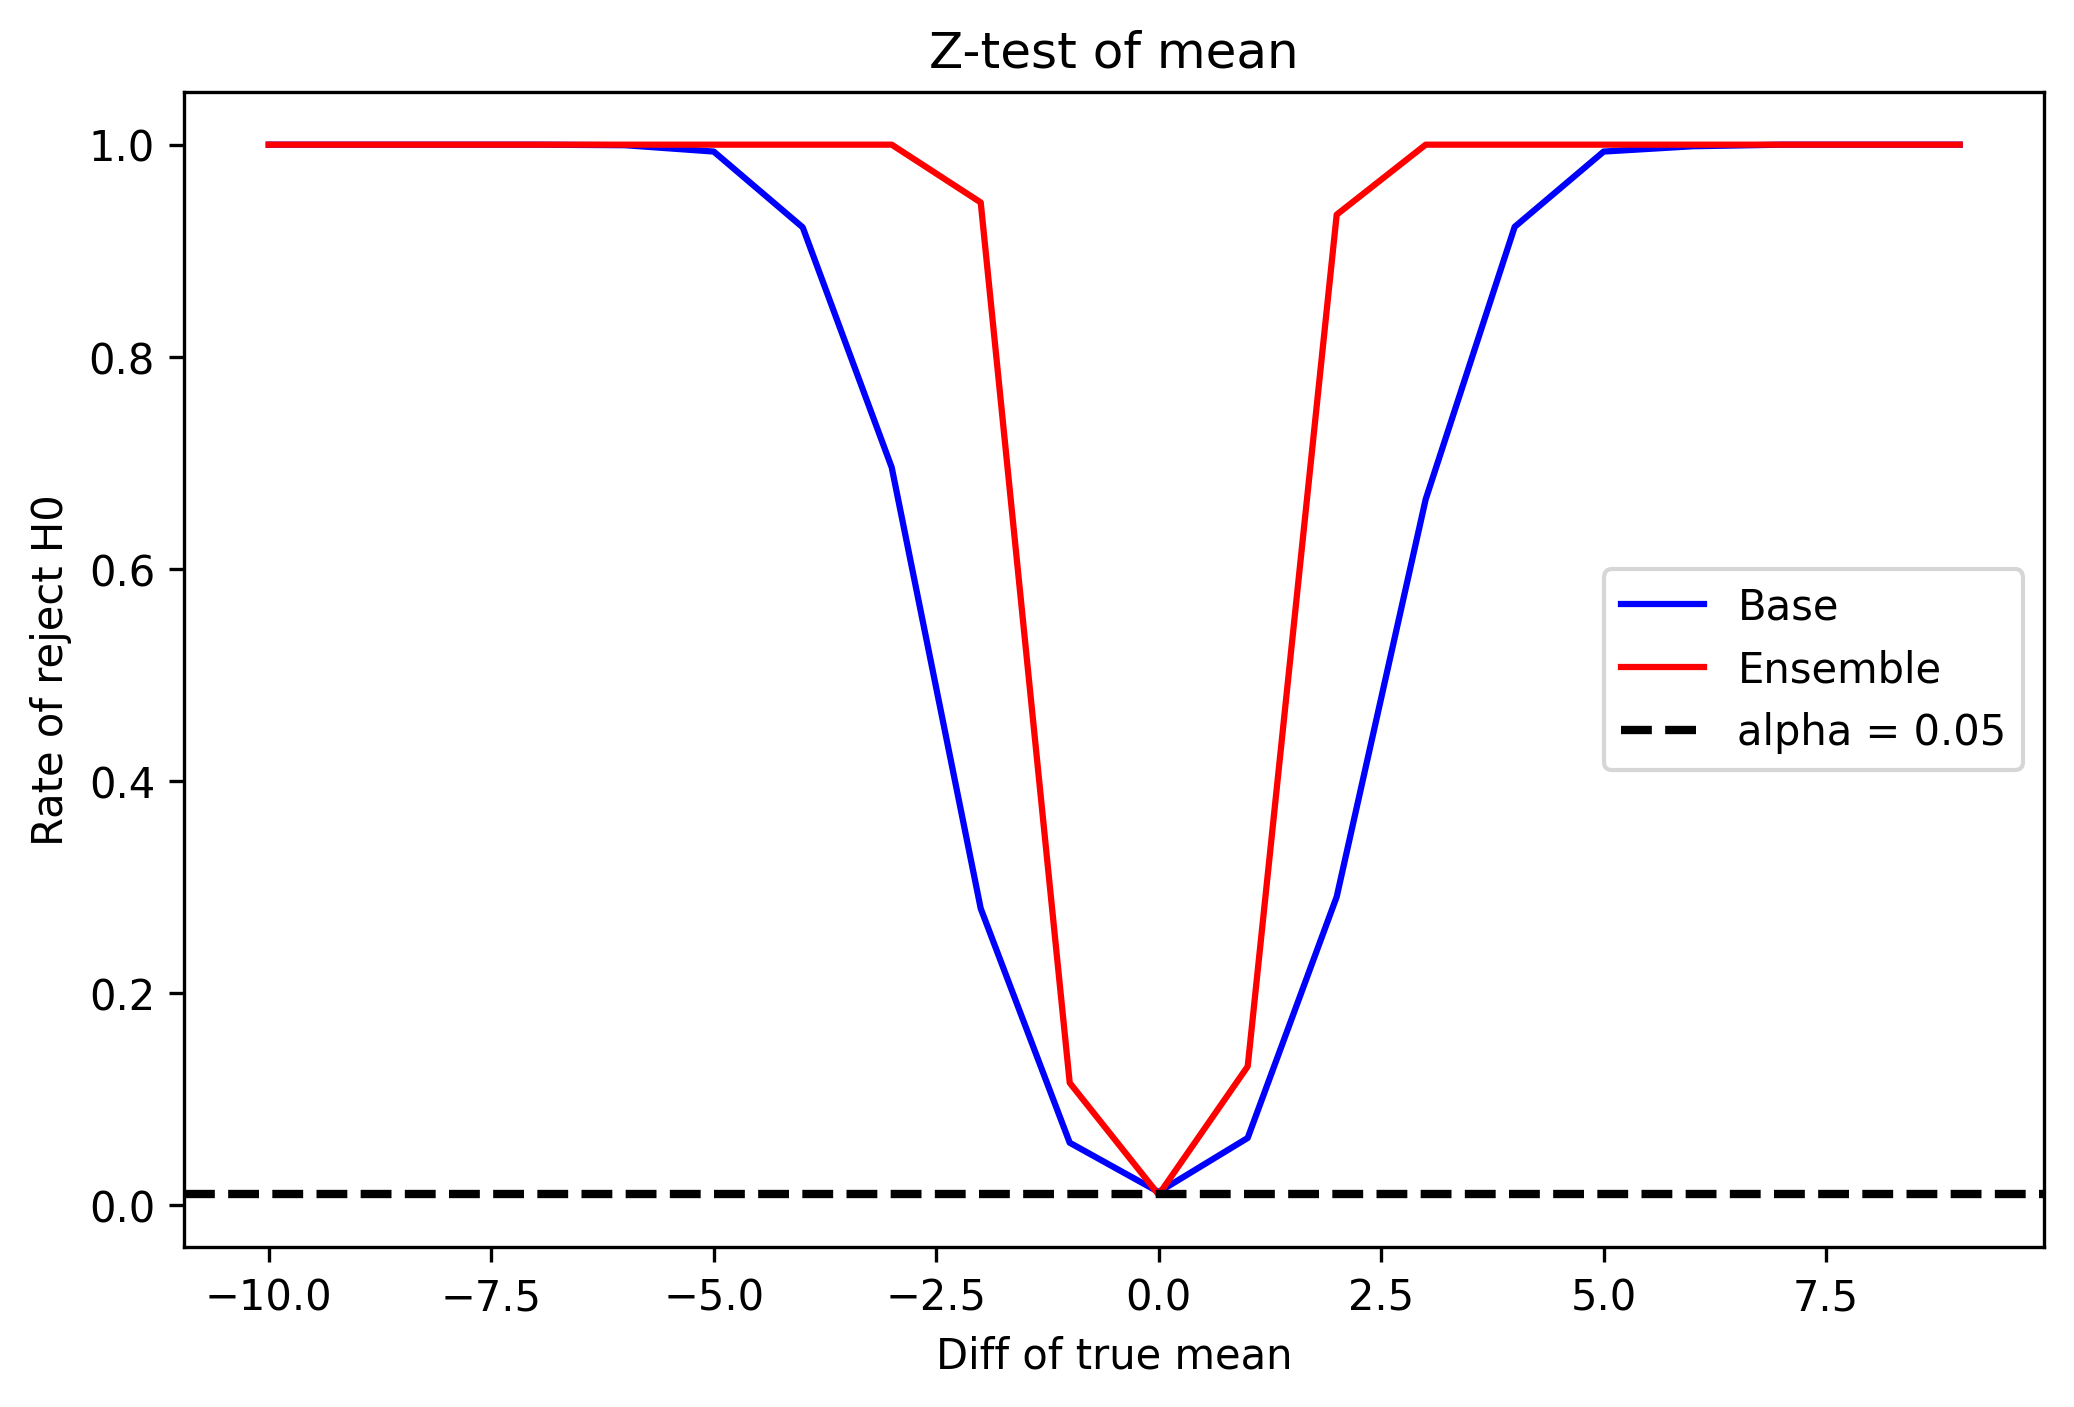

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


re = []
ere = []
x = list(range(-10,10))
for i in x:
    # 模拟参数
    n = 100  # 样本大小
    mu_0 = 0  # 原假设均值
    sigma = 10  # 样本标准差
    alpha = 0.01  # 显著性水平
    mu_real = i  # 实际均值（用于检验 H_a）

    # 模拟次数
    n_sim = 2000
    reject_null = 0
    E_reject_null = 0
    # 模拟过程
    for _ in range(n_sim):
        # 在原假设下生成样本数据
        sample = np.random.normal(mu_real, sigma, n)
        sample_mean = np.mean(sample)
        
        # 计算检验统计量
        z_score = (sample_mean - mu_0) / (sigma / np.sqrt(n))
        p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # 双侧检验
        
        # 判断是否拒绝原假设
        if p_value < alpha:
            reject_null += 1

        pVal = []
        for i in range(50):
            sub_data = np.random.normal(mu_real, sigma, n)
            sub_data_mean = np.mean(sub_data)
            z_score = (sub_data_mean - mu_0) / (sigma / np.sqrt(n))
            p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # 双侧检验
            pVal.append(p_value)

        t = np.mean(np.tan((np.abs(0.5-np.array(pVal)))*np.pi))
        #if 0.5-np.arctan(t)/np.pi < alpha:
        #if np.mean(pVal) < alpha:
        #if np.mean(np.array(pVal)<alpha)>0.5:
        if 0.5-np.arctan(t)/np.pi < alpha/2:
            E_reject_null += 1
    # 结果分析
    re.append(reject_null / n_sim)
    ere.append(E_reject_null/n_sim)


plt.figure(figsize=(8, 5), dpi=300)
plt.plot(x, re, color="blue", label="Base")
plt.plot(x, ere, color="red", label="Ensemble")



plt.title("Z-test of mean")
plt.ylabel("Rate of reject H0")
plt.xlabel("Diff of true mean")

plt.axhline(y=0.01, color="black", linestyle="--", linewidth=2, label="alpha = 0.01")

plt.legend()
plt.show()

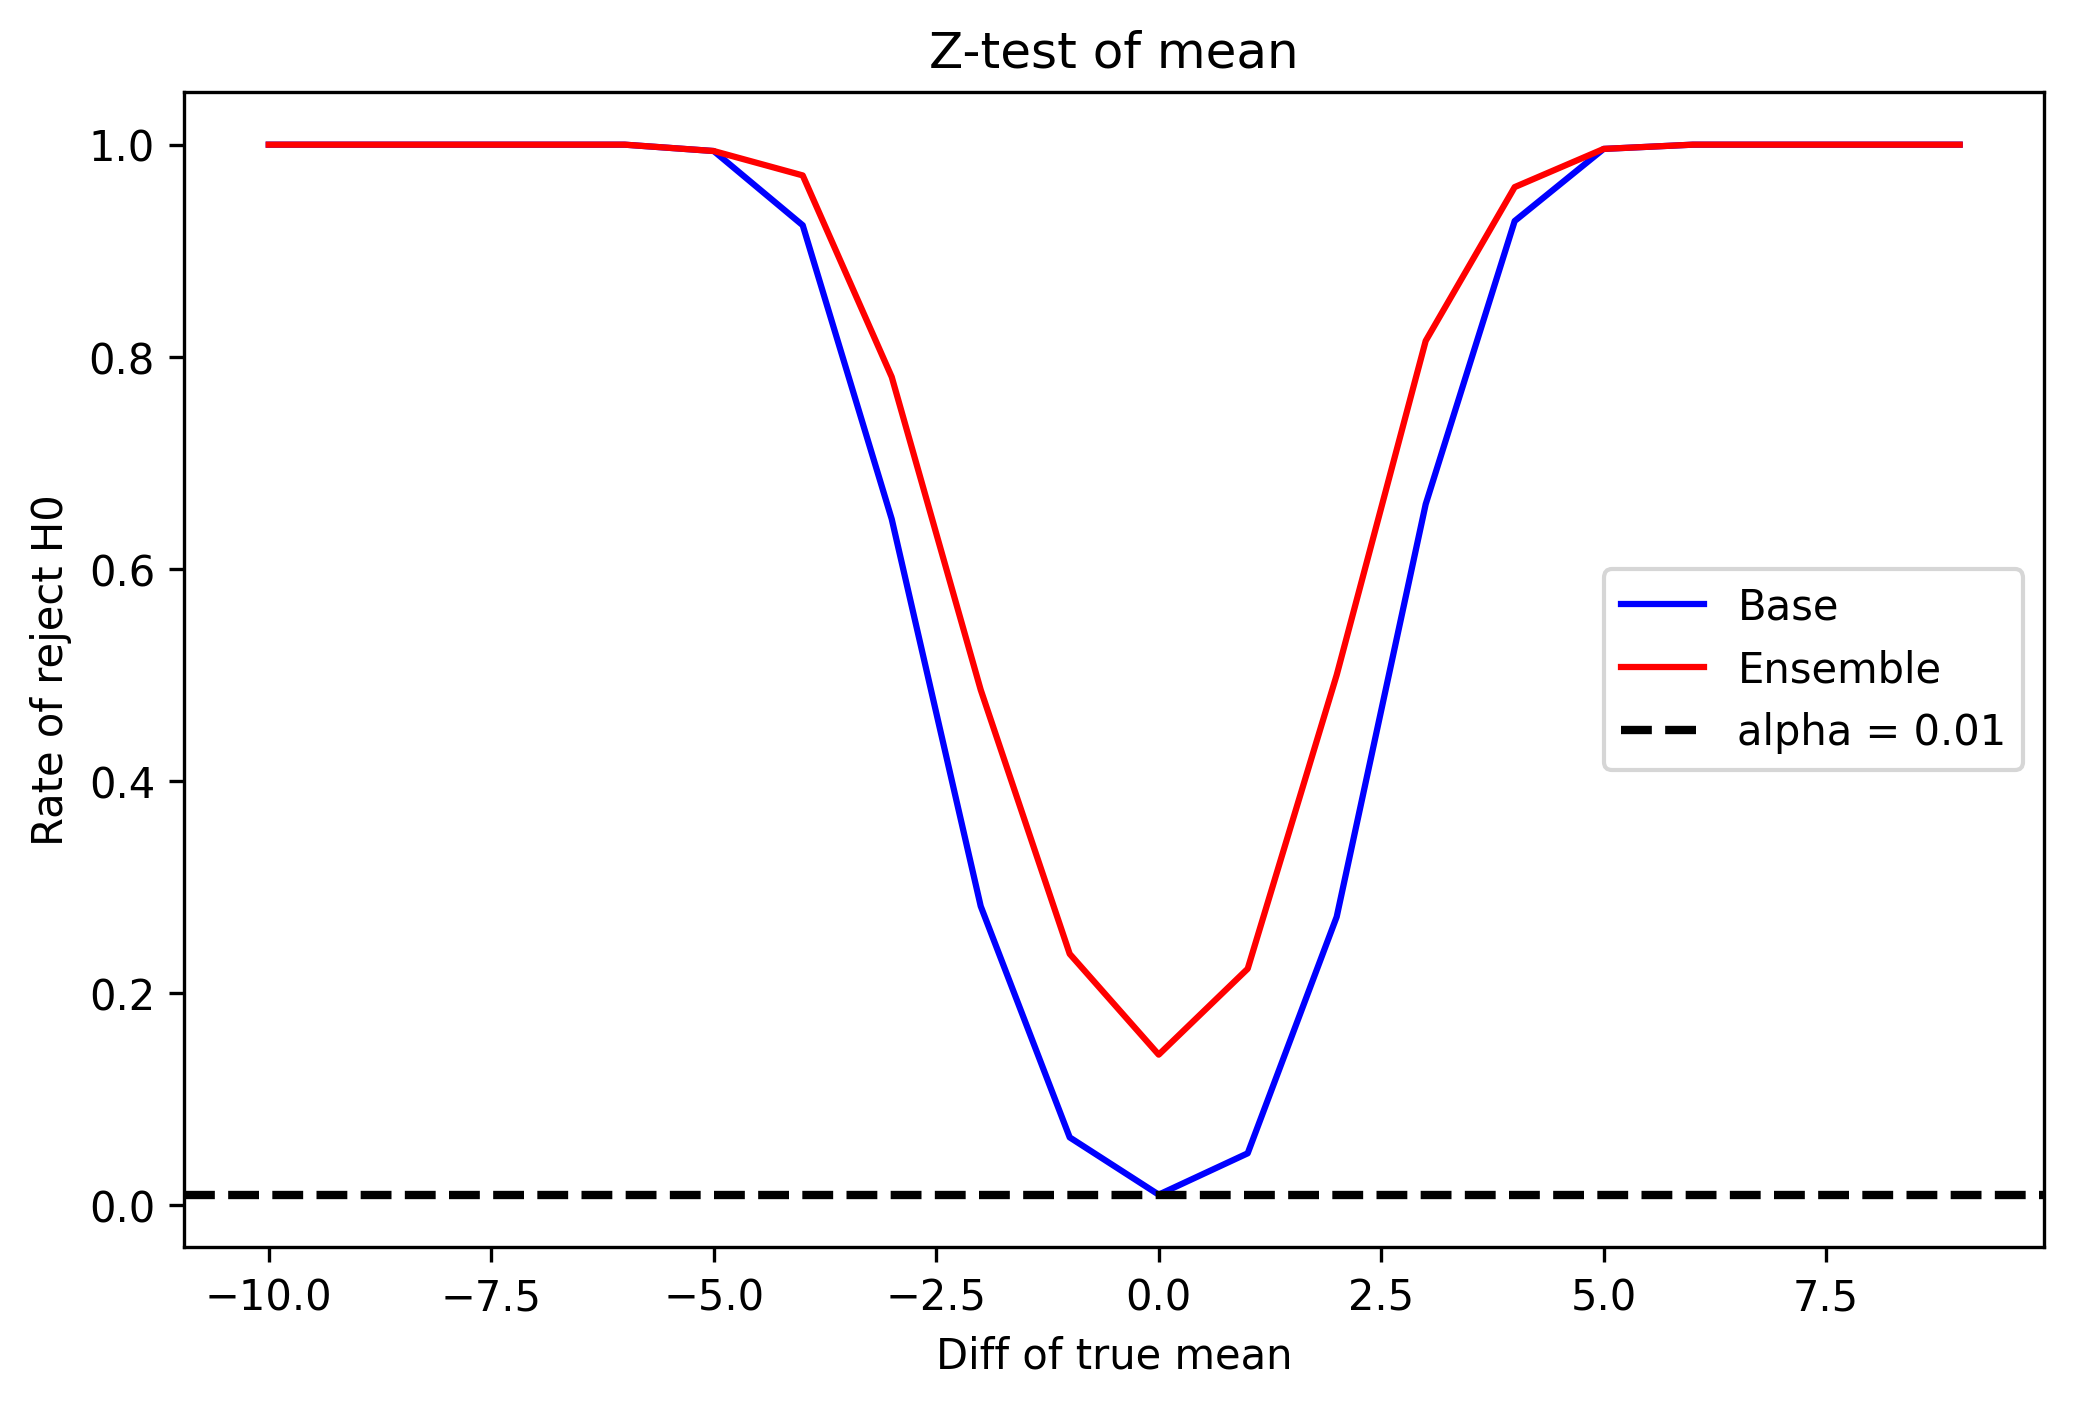

In [24]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


re = []
ere = []
x = list(range(-10,10))
for i in x:
    # 模拟参数
    n = 100  # 样本大小
    mu_0 = 0  # 原假设均值
    sigma = 10  # 样本标准差
    alpha = 0.01  # 显著性水平
    mu_real = i  # 实际均值（用于检验 H_a）

    # 模拟次数
    n_sim = 1000
    reject_null = 0
    E_reject_null = 0
    # 模拟过程
    for _ in range(n_sim):
        # 在原假设下生成样本数据
        sample = np.random.normal(mu_real, sigma, n)
        sample_mean = np.mean(sample)
        
        # 计算检验统计量
        z_score = (sample_mean - mu_0) / (sigma / np.sqrt(n))
        p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # 双侧检验
        
        # 判断是否拒绝原假设
        if p_value < alpha:
            reject_null += 1

        pVal = []
        for i in range(100):
            sub_data = np.random.choice(sample, size=10, replace=True)#np.random.normal(mu_real, sigma, n)
            sub_data_mean = np.mean(sub_data)
            z_score = (sub_data_mean - mu_0) / (sigma / np.sqrt(n))
            p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # 双侧检验
            pVal.append(p_value)

        t = np.mean(np.tan((np.abs(0.5-np.array(pVal)))*np.pi))
        #if 0.5-np.arctan(t)/np.pi < alpha:
        #if np.mean(pVal) < alpha:
        if np.mean(np.array(pVal)<alpha)>0.5:
        #if 0.5-np.arctan(t)/np.pi < alpha/2:
            E_reject_null += 1
    # 结果分析
    re.append(reject_null / n_sim)
    ere.append(E_reject_null/n_sim)


plt.figure(figsize=(8, 5), dpi=300)
plt.plot(x, re, color="blue", label="Base")
plt.plot(x, ere, color="red", label="Ensemble")



plt.title("Z-test of mean")
plt.ylabel("Rate of reject H0")
plt.xlabel("Diff of true mean")

plt.axhline(y=0.01, color="black", linestyle="--", linewidth=2, label="alpha = 0.01")

plt.legend()
plt.show()